In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('Data.csv')

In [39]:
X = data.iloc[:,:-1].values
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [40]:
Y = data.iloc[:,-1].values
Y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [41]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
regressor = RandomForestRegressor(n_estimators=60)


In [44]:
regressor.fit(X_Train,Y_Train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred = regressor.predict(X_Test)

In [46]:
from sklearn.metrics import r2_score

r2_score(Y_Test,y_pred)

0.9617535682883522

Text(0, 0.5, 'R2 score')

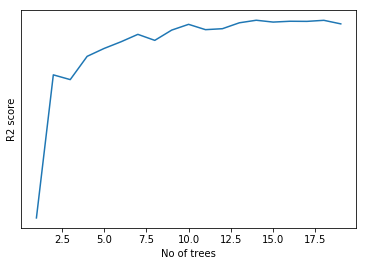

In [47]:
# checking the number of trees
no_of_trees = np.arange(1,20)
r2_scores = []
max_r2_score = 0
best_no_of_trees=0

for no_of_tree in no_of_trees:
    regressor = RandomForestRegressor(n_estimators=no_of_tree)
    regressor.fit(X_Train,Y_Train)
    y_pred = regressor.predict(X_Test)
    r2 = r2_score(Y_Test,y_pred)
    r2_scores.append(r2 * 100)
    
    if max_r2_score < r2:
        max_r2_score = r2
        best_no_of_trees = no_of_tree
        
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(no_of_trees,r2_scores)
ax.set_yscale('log')
ax.set_xlabel('No of trees')
ax.set_ylabel('R2 score')